<a href="https://colab.research.google.com/github/tufte28/MAT-494/blob/main/2_4_MaximumLikelihoodEstimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2.4 Maximum Likelihood Estimation

In [2]:
import numpy as np
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import pandas as pd

Create continuous domain for fabricated independent variable

In [21]:
x = np.linspace(0, 100, 50)

Establish normally distributed residuals and input into fabricated regression equation (plot)

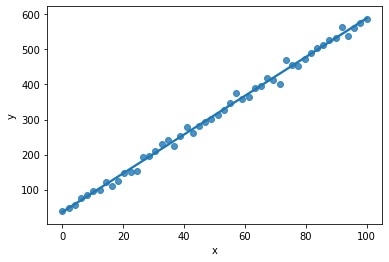

In [22]:
e = np.random.normal(20, 10, 50)
y = 12 + 5.6*x + e
Data = pd.DataFrame({'x':x, 'y':y})
sns.regplot(x='x', y='y', data = Data)
plt.show()

Perform OLS Regression

In [14]:
features = api.add_constant(Data.x)
model = api.OLS(y, features).fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.431e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           4.35e-61
Time:                        02:41:26   Log-Likelihood:                -183.01
No. Observations:                  50   AIC:                             370.0
Df Residuals:                      48   BIC:                             373.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.1251      2.675     13.132      0.000      29.747      40.503
x              5.5140      0.046    119.626      0.000       5.421       5.607
==============================================================================
Omnibus:                        0.982   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.612   Jarque-Bera (JB):                0.440
Skew:                          -0.204   Prob(JB):                        0.802
Kurtosis:                       3.211   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Calculate Standard Deviation to compare to MLE

In [15]:
residual = model.resid
sd = np.std(residual)
sd

9.405007699007081

In [23]:
def MLE_Norm(parameters):
  const, beta, sd = parameters
  pred = const + beta*x
  LL = np.sum(stats.norm.logpdf(y, pred, sd))
  neg_LL = -1*LL
  return neg_LL
MLE = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
MLE

      fun: 190.65713029349607
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.84217071e-06, -2.27373677e-04, -1.98951950e-05])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 292
      nit: 49
     njev: 73
   status: 0
  success: True
        x: array([36.07141991,  5.5281024 , 10.95945057])

The parameter, constant and standard deviation are all equivalent between the two.